# Plot for Summary Report: Milk Production after Calving

In [1]:
%run 'helpers-for-report-plot-generation.ipynb'

In [2]:
def retrieve_data():
    milk = get_dataset('milk_volume')
    birthdates = get_dataset('birthdates')[['animal_id', 'birthdate']]
    return milk, birthdates
milk, birthdates = retrieve_data()

In [3]:
milk = milk.set_index('date')['2016-01-01':'2017-12-31']

In [4]:
def append_cow_age_to_milk_dataframe(milk, birthdates):
    """ Adds a cows age in month for each day milked"""
    milk = milk.reset_index()
    milk = pd.merge(left=milk, right=birthdates, left_on='animal_id', right_on='animal_id')
    milk['months_aged'] = (milk['date'] - milk['birthdate']).astype('timedelta64[M]')
    return milk

In [5]:
milk_with_age = append_cow_age_to_milk_dataframe(milk, birthdates)

In [6]:
# Cows who are on their 1,2 lactations are assumed to be less than 36 months in age
aged_boolean_mask = milk_with_age['months_aged'] > 36
aged_cows = milk_with_age[aged_boolean_mask]
non_aged = milk_with_age[~aged_boolean_mask]

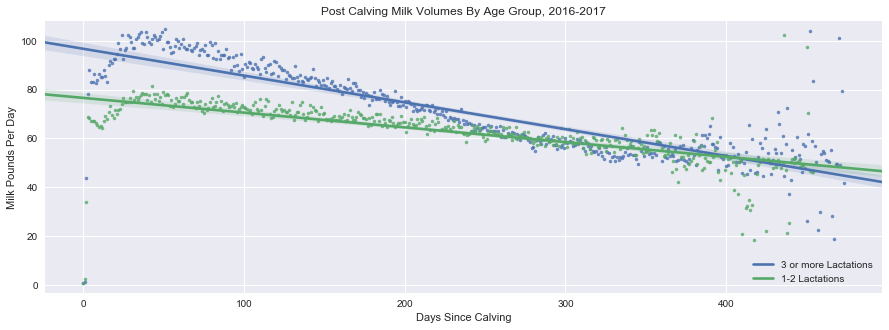

In [7]:
def plot_average_milk_volumes_after_calving(aged_cows, non_aged):
    fig, ax = plt.subplots(figsize=(15, 5))

    aged_cows = aged_cows.groupby('days_since_calving').mean().reset_index()
    ax1 = sns.regplot(aged_cows['days_since_calving'], aged_cows['milk_weight'], marker='.', ax=ax)
    _ = plt.margins(0.03)
    _ = plt.xlabel('Days Since Calving')
    _ = plt.ylabel('Milk Pounds')

    non_aged = non_aged.groupby('days_since_calving').mean().reset_index()
    ax2 = sns.regplot(non_aged['days_since_calving'], non_aged['milk_weight'], marker='.', ax=ax)
    _ = plt.margins(0.03)
    _ = plt.xlabel('Days Since Calving')
    _ = plt.ylabel('Milk Pounds Per Day')
    

    plt.legend(('3 or more Lactations', '1-2 Lactations'))
    plt.title('Post Calving Milk Volumes By Age Group, 2016-2017')
    save_plot_for_summary_report('milk-production-after-calving.png')
    plt.show()
    
plot_average_milk_volumes_after_calving(aged_cows, non_aged)